# Import Libraries

In [9]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit.tools.monitor import job_monitor
from azure.quantum.qiskit import AzureQuantumProvider
import IPython.display

# Connect to Azure Quantum service

In [10]:
provider = AzureQuantumProvider (
    resource_id = "/subscriptions/b1d7f7f8-743f-458e-b3a0-3e09734d716d/resourceGroups/aq-hackathons/providers/Microsoft.Quantum/Workspaces/aq-hackathon-01",
    location = "eastus"
)

In [11]:
"""
Printing possible user backends with options:
1 - Quantum Simulator 
2 - Quantum Processing Unit
"""
print([backend.name() for backend in provider.backends()])

['ionq.qpu', 'ionq.simulator']


In [12]:
sim = provider.get_backend('ionq.simulator')

# Tic Tac Toe Game

In [13]:
def display_board(board_visual:list):
    """To visualize the board, this is called. Numbered squares follow the standard phone number pattern of increasing left to right and down."""
    print(f'''
    Current Board:
     {board_visual[0]} | {board_visual[1]} | {board_visual[2]} 
    -----------------
     {board_visual[3]} | {board_visual[4]} | {board_visual[5]} 
    -----------------
     {board_visual[6]} | {board_visual[7]} | {board_visual[8]}  ''')

In [1]:
def get_victor(board:list):
    """3 Consecutive squares wins. Returns value in the winning square or None."""
    if board[0] == board[1] == board[2] or board[0] == board[4] == board[8] or board[0] == board[3] == board[6]:
        return board[0]
    elif board[1] == board[4] == board[7]:
        return board[1]
    elif board[2] == board[4] == board[6] or board[2] == board[5] == board[8]:
        return board[2]
    elif board[3] == board[4] == board[5]:
        return board[3]
    elif board[6] == board[7] == board[8]:
        return board[6]
    else:
        return None

In [15]:
def play(backend, shots):
    # Create the Tic Tac Toe game board with 9 qubits and 9 classical bits
    board = QuantumCircuit(9,9)
    board_visual = ['   ','   ','   ','   ','   ','   ','   ','   ','   ']
    available_moves = ['0','1','2','3','4','5','6','7','8']

    player1Value = input('Player 1, will you be 1\'s or 0\'s? ')

    # Make sure player 1 input correct value
    while player1Value not in ['0','1']:
        player1Value = input('Player 1, will you be 1\'s or 0\'s? ')

    player2Value = '1' if player1Value == '0' else '0'

    print('''
    Please select squares with the indicated numbers:
      0  |  1  |  2 
    -----------------
      3  |  4  |  5 
    -----------------
      6  |  7  |  8  ''')

    # Run player moves
    while len(available_moves) > 0:
        # Player 1's Turn
        player1MovePosition = input('Player 1, where would you like to move? ')

        # Make sure player 1 input correct value
        while player1MovePosition not in available_moves:
            player1MovePosition = input('Player 1, where would you like to move? ')

        available_moves.remove(player1MovePosition)
        
        if player1Value == '1':
            board.x(int(player1MovePosition))
            board_visual[int(player1MovePosition)] = '|1>'
        else:
            board_visual[int(player1MovePosition)] = '|0>'


        display_board(board_visual)

        if len(available_moves) == 0:
            break

        # Player 2's Turn
        player2MovePosition = input('Player 2, where would you like to move? ')

        # Make sure player 2 input correct value
        while player2MovePosition not in available_moves:
            player2MovePosition = input('Player 2, where would you like to move? ')

        available_moves.remove(player2MovePosition)
        
        if player2Value == '1':
            board.x(int(player2MovePosition))
            board_visual[int(player2MovePosition)] = '|1>'
        else:
            board_visual[int(player2MovePosition)] = '|0>'

        display_board(board_visual)

    # Measure all qubits and display the circuit
    board.measure(range(9),range(9))
    display(board.draw())

    # Run quantum circuit
    job = backend.run(board, shots=shots)
    job_id = job.id()
    print(f'\nJob id: {job_id}')

    # Monitor job to run
    job_monitor(job)

    # Get job results
    result = job.result()
    counts = result.get_counts()
    display(plot_histogram(counts))
    sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
    top_count_board = []
    top_count_board[:0] = sorted_counts[0][0]
    print(top_count_board)

    # Determine victor
    victor = get_victor(top_count_board)
    if victor == player1Value:
        print('Player 1 won the match!')
    elif victor == player2Value:
        print('Player 2 won the match!')
    else:
        print('This match was a tie.')


    


    Please select squares with the indicated numbers:
      0  |  1  |  2 
    -----------------
      3  |  4  |  5 
    -----------------
      6  |  7  |  8  

    Current Board:
     |1> |     |     
    -----------------
         |     |     
    -----------------
         |     |      

    Current Board:
     |1> | |0> |     
    -----------------
         |     |     
    -----------------
         |     |      

    Current Board:
     |1> | |0> |     
    -----------------
         | |1> |     
    -----------------
         |     |      

    Current Board:
     |1> | |0> |     
    -----------------
         | |1> | |0> 
    -----------------
         |     |      

    Current Board:
     |1> | |0> |     
    -----------------
         | |1> | |0> 
    -----------------
         |     | |1>  

    Current Board:
     |1> | |0> |     
    -----------------
     |0> | |1> | |0> 
    -----------------
         |     | |1>  

    Current Board:
     |1> | |0> | |1> 
    -----

┌───┐            ┌─┐            
q_0: ┤ X ├────────────┤M├────────────
     └───┘┌─┐         └╥┘            
q_1: ─────┤M├──────────╫─────────────
     ┌───┐└╥┘          ║ ┌─┐         
q_2: ┤ X ├─╫───────────╫─┤M├─────────
     └───┘ ║ ┌─┐       ║ └╥┘         
q_3: ──────╫─┤M├───────╫──╫──────────
     ┌───┐ ║ └╥┘       ║  ║ ┌─┐      
q_4: ┤ X ├─╫──╫────────╫──╫─┤M├──────
     └───┘ ║  ║ ┌─┐    ║  ║ └╥┘      
q_5: ──────╫──╫─┤M├────╫──╫──╫───────
           ║  ║ └╥┘┌─┐ ║  ║  ║       
q_6: ──────╫──╫──╫─┤M├─╫──╫──╫───────
     ┌───┐ ║  ║  ║ └╥┘ ║  ║  ║ ┌─┐   
q_7: ┤ X ├─╫──╫──╫──╫──╫──╫──╫─┤M├───
     ├───┤ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_8: ┤ X ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├
     └───┘ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 9/══════╩══╩══╩══╩══╩══╩══╩══╩══╩═
           1  3  5  6  0  2  4  7  8


Job id: 2082c900-8142-11ec-8689-00155d929cd0
Job Status: job has successfully run


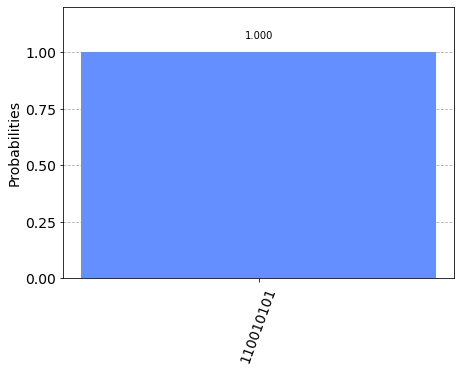

['1', '1', '0', '0', '1', '0', '1', '0', '1']
Player 1 won the match!


In [16]:
play(backend=sim, shots=1024)